In [13]:
import pickle
import numpy
import matplotlib.pylab as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
from datetime import datetime


with open('pop_rate_0809_18_51.pkl', 'rb') as f:
    data = pickle.load(f)

In [10]:
def get_decision_time(pop_rate, threshold=25):
    rate_A = pop_rate['pop_rate_a']
    rate_B = pop_rate['pop_rate_b']
    
    above_thre_A = (pop_rate['pop_rate_a'] > threshold)
    idx_over_threshold_A = numpy.where(above_thre_A==True)


    above_thre_B = (pop_rate['pop_rate_b'] > threshold)
    idx_over_threshold_B = numpy.where(above_thre_B==True)


    # monitor each firing rate at every moment 
    decision_time_A = 0

    decision_time_B = 0

    for i in range(len(above_thre_A)):

        # find the time when the divergen starts happening

        above_thre_A = (rate_A > threshold)
        idx_over_threshold_A = numpy.where(above_thre_A==True)


        above_thre_B = (rate_B > threshold)
        idx_over_threshold_B = numpy.where(above_thre_B==True)



    if len(idx_over_threshold_A[0]) > 0:
        decision_time_A = idx_over_threshold_A[0][0];
        
    else: 
        pass

    if len(idx_over_threshold_B[0]) > 0:
        decision_time_B = idx_over_threshold_B[0][0];

    else: 
        pass
    

    #print(decision_time_A, decision_time_B)
    return decision_time_A, decision_time_B



In [11]:
def plot_rate(pop_rate):
    rate_a = pop_rate['pop_rate_a']
    rate_b = pop_rate['pop_rate_b']
    time = pop_rate['time']
    plt.rcParams['font.size'] = 18

    
    
    plt.plot(time, rate_a,  linewidth= 2.5)
    plt.plot(time, rate_b, linewidth= 2.5)
    plt.ylabel('Firing rate (Spikes/s)')
    plt.xlabel('time (ms)')
    plt.legend(['Population A', 'Population B'])
    plt.show()


In [12]:
decision_times = []
rt = []

for i in range(len(data)):
    
    decision_time = get_decision_time(data[i])
    
    decision_times.append(decision_time)
    rt.append(max(decision_time))
        

In [14]:
curDT = datetime.now()
time = curDT.strftime("%m%d_%H_%M")

with open('100_decision_time_' + time + '.pkl', 'wb') as f:
    pickle.dump(rt, f)

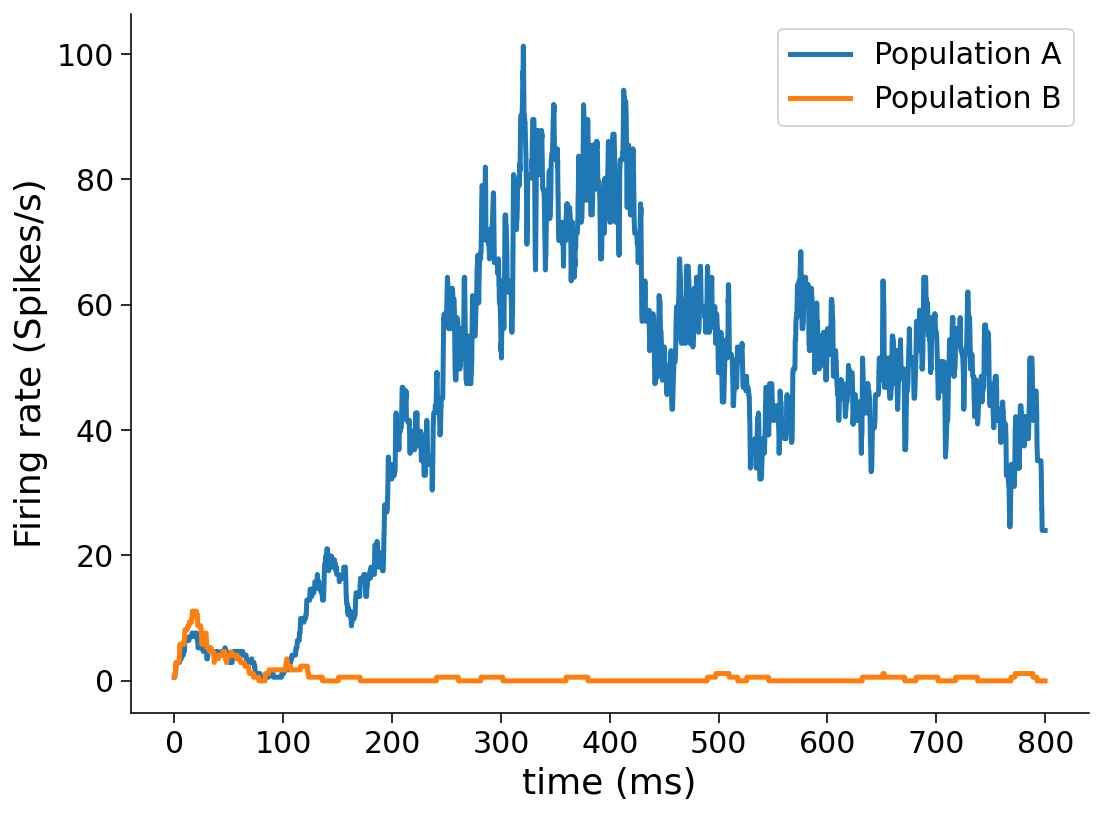

In [17]:
plot_rate(data[2])


In [19]:
rt.mean()

AttributeError: 'list' object has no attribute 'mean'

In [20]:
type(rt)

list

In [22]:
decision_time = numpy.array(rt)

In [26]:
numpy.max(decision_time)

3508

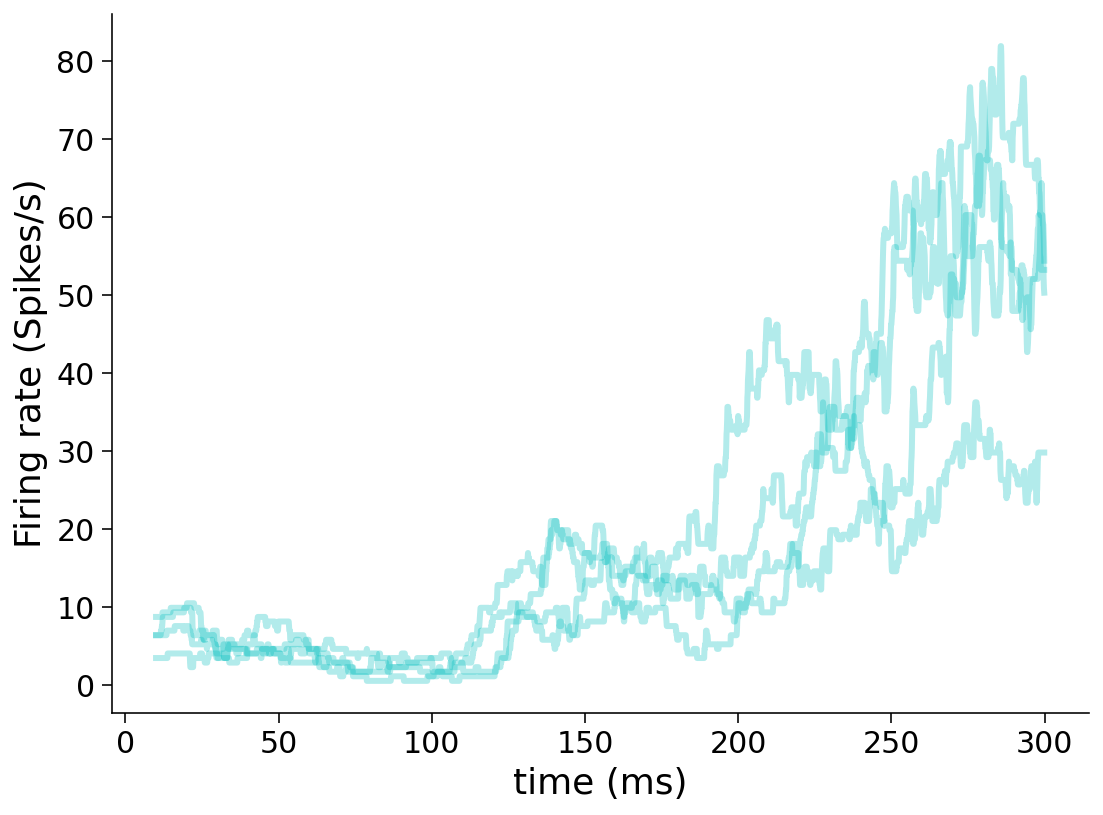

In [54]:
rate_a = data[0]['pop_rate_a']
rate_b = data[1]['pop_rate_a']
time = data[0]['time']
plt.rcParams['font.size'] = 18

    
    
plt.plot(time[100:3000], data[0]['pop_rate_a'][100:3000], 'c', alpha = 0.3, linewidth= 3)
plt.plot(time[100:3000], data[1]['pop_rate_a'][100:3000], 'c', alpha = 0.3, linewidth= 3)
plt.plot(time[100:3000], data[2]['pop_rate_a'][100:3000], 'c', alpha = 0.3, linewidth= 3)
plt.plot(time[100:3000], data[3]['pop_rate_a'][100:3000], 'c', alpha = 0.3, linewidth= 3)

plt.ylabel('Firing rate (Spikes/s)')
plt.xlabel('time (ms)')
plt.show()

In [69]:
def overlap_rate(data, start, end, trial_num):
    time = data[0]['time']

    for i in range(trial_num):
        
        plt.plot(time[start:end], data[i]['pop_rate_a'][start:end], 'c', alpha = 0.1, linewidth= 3)
        
    plt.ylabel('Firing rate (Spikes/s)')
    plt.xlabel('time (ms)')
    plt.show()


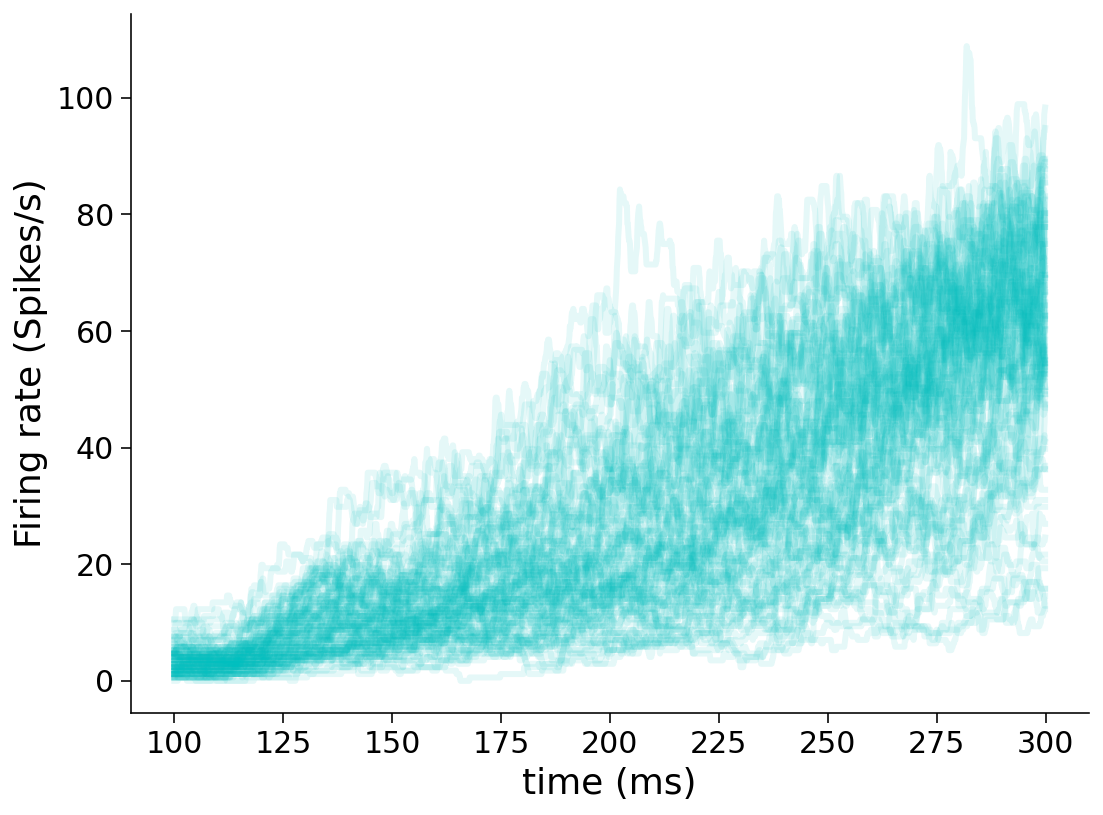

In [70]:
overlap_rate(data, 1000, 3000, 100)

In [71]:
decision_times = []
rt = []


for i in range(len(data)):
    
    decision_time = get_decision_time(data[i])
    
    decision_times.append(decision_time)
    rt.append(max(decision_time))
    
    
    

In [74]:
rt_median = numpy.median(rt)

In [84]:
rt_np = numpy.array(rt)

In [98]:
a= numpy.where(rt_np == rt_median+0.5)

In [99]:
a

(array([], dtype=int64),)

In [96]:
type(rt_np[0])

numpy.int64

In [94]:
rt_median

2064.5

In [86]:
rt

[2082,
 2433,
 1929,
 2247,
 2032,
 2729,
 1409,
 1551,
 2063,
 2546,
 2231,
 2655,
 1811,
 2615,
 1849,
 2112,
 2413,
 2224,
 2218,
 2120,
 2141,
 2241,
 1832,
 2358,
 1587,
 1979,
 2197,
 1502,
 3155,
 1703,
 1614,
 2644,
 2070,
 1603,
 2267,
 3183,
 2439,
 2182,
 2386,
 1564,
 2093,
 2022,
 1494,
 3508,
 1694,
 1781,
 1487,
 2602,
 2066,
 1873,
 1526,
 1355,
 2156,
 2845,
 1972,
 1594,
 1864,
 1863,
 2442,
 2832,
 1754,
 2297,
 2416,
 1640,
 3238,
 1669,
 1715,
 2341,
 2342,
 1661,
 1460,
 1697,
 2123,
 2787,
 1605,
 2530,
 1883,
 2091,
 1681,
 1726,
 1695,
 2835,
 1914,
 2035,
 2040,
 1935,
 2388,
 2190,
 2947,
 1975,
 2162,
 3494,
 1983,
 1354,
 1376,
 2445,
 1624,
 2032,
 1897,
 2622]

In [83]:
type(rt)

list